# pyEMU basics

In this exercise, we will explore some of the capabilities of pyemu to deal with the PEST file formats, such as .pst, .jco/.jcb, .unc, .cov, .mat, etc, as well as generating PEST interface elements

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pyemu

In [2]:
pyemu.__path__  # check that we're pointing to the provided snapshot of pyemu (and flopy) repos

['C:\\Dev\\decision_support_analysis_notebooks\\notebooks\\pyemu']

We will use some pre-cooked files in this notebook:

In [3]:
f_d = "handling_files"

os.listdir(f_d)

['.DS_Store',
 'flux.dat.ins',
 'freyberg.hyd.bin.dat',
 'freyberg.hyd.bin.dat.ins',
 'freyberg.mpbas.tpl',
 'freyberg.rch.tpl',
 'freyberg.sfo.processed',
 'freyberg.sfo.processed.ins',
 'freyberg.sfr.tpl',
 'freyberg.travel',
 'freyberg.travel.ins',
 'freyberg_pp.jcb',
 'freyberg_pp.par',
 'freyberg_pp.post.cov',
 'freyberg_pp.pst',
 'freyberg_pp.rec',
 'freyberg_pp.rei',
 'hkpp.dat',
 'hkpp.dat.fac',
 'hkpp.dat.tpl',
 'test.insfile_data.csv',
 'test.obs_data.csv',
 'test.pargrp_data.csv',
 'test.par_data.csv',
 'test.pi_data.csv',
 'test.pst',
 'test.tplfile_data.csv',
 'test2.pst',
 'vol.dat.ins',
 'WEL_0001.dat.temp.tpl',
 'WEL_0002.dat.temp.tpl']

### Control files and the `Pst` class

pyEMU encapsulates the PEST control file in the `Pst` class

In [4]:
pst = pyemu.Pst(os.path.join(f_d,"freyberg_pp.pst"))

In [5]:
pst

The "*" sections of the control file are stored as attributes of the `Pst` instance (the PEST variable names are used for consistency)

In [6]:
pst.parameter_data.head()

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom,extra
parnme,,,,,,,,,,,
hk00,hk00,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1,NaN
hk01,hk01,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1,NaN
hk02,hk02,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1,NaN
hk03,hk03,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1,NaN
hk04,hk04,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1,NaN


In [7]:
pst.observation_data.head()

,obsnme,obsval,weight,obgnme,extra
obsnme,,,,,
c001cr03c10_19700102,c001cr03c10_19700102,26.661526,5.0,calhead,NaN
c001cr03c16_19700102,c001cr03c16_19700102,23.460564,5.0,calhead,NaN
c001cr04c09_19700102,c001cr04c09_19700102,28.513522,5.0,calhead,NaN
c001cr10c02_19700102,c001cr10c02_19700102,30.741689,5.0,calhead,NaN
c001cr14c11_19700102,c001cr14c11_19700102,25.871208,5.0,calhead,NaN


Control data is handled by a special class that tries to prevent stupidity

In [8]:
pst.control_data.formatted_values

name
rstfle                        restart
pestmode               regularization
npar                               48
nobs                             1013
npargp                              6
nprior                            422
nobsgp                             26
maxcompdim                          0
ntplfle                             6
ninsfle                             5
precis                         single
dpoint                          point
numcom                              1
jacfile                             0
messfile                            0
obsreref                   noobsreref
rlambda1                 2.000000E+01
rlamfac                 -3.000000E+00
phiratsuf                3.000000E-01
phiredlam                1.000000E-02
numlam                             -7
jacupdate                         999
lamforgive                 lamforgive
derforgive               noderforgive
relparmax                1.000000E+01
facparmax                1.000000E+01
facorig

In [9]:
pst.control_data.noptmax = "junk"

ValueError: invalid literal for int() with base 10: 'junk'

PEST++ options are stored in a dict:

In [10]:
pst.pestpp_options

{'n_iter_base': '-1',
 'lambda_scale_fac': '1.0',
 'n_iter_super': '3',
 'lambdas': '0.1,1.0,10.0',
 'forecasts': 'travel_time,fa_headwaters_0001,c001fr16c17_19791231,c001fr05c04_19791231',
 'upgrade_augment': 'false'}

In [11]:
pst.pestpp_options["lambdas"].split(',')

['0.1', '1.0', '10.0']

### Writing a control file

In [12]:
pst.write(os.path.join(f_d,"test.pst"))

noptmax:6, npar_adj:48, nnz_obs:14


Version 2 PEST++ control file

In [13]:
pst.write(os.path.join(f_d,"test.pst"),version=2)

noptmax:6, npar_adj:48, nnz_obs:14


In [ ]:
!cat "handling_files/test.pst"

### Constructing a control file from template and instruction files

### DIY: get a new control file from a template file (or files) and an instruction file (or files).  You can use the files in the `f_d` directory, from the GWV excersize, or you can write your own.  Change par bounds and obs weights then write

In [14]:
[f for f in os.listdir(f_d) if f[-3:] in ["tpl","ins"]]

['flux.dat.ins',
 'freyberg.hyd.bin.dat.ins',
 'freyberg.mpbas.tpl',
 'freyberg.rch.tpl',
 'freyberg.sfo.processed.ins',
 'freyberg.sfr.tpl',
 'freyberg.travel.ins',
 'hkpp.dat.tpl',
 'vol.dat.ins',
 'WEL_0001.dat.temp.tpl',
 'WEL_0002.dat.temp.tpl']

In [15]:
pyemu.helpers.parse_dir_for_io_files(f_d)

(['freyberg.mpbas.tpl',
  'freyberg.rch.tpl',
  'freyberg.sfr.tpl',
  'hkpp.dat.tpl',
  'WEL_0001.dat.temp.tpl',
  'WEL_0002.dat.temp.tpl'],
 ['freyberg.mpbas',
  'freyberg.rch',
  'freyberg.sfr',
  'hkpp.dat',
  'WEL_0001.dat.temp',
  'WEL_0002.dat.temp'],
 ['flux.dat.ins',
  'freyberg.hyd.bin.dat.ins',
  'freyberg.sfo.processed.ins',
  'freyberg.travel.ins',
  'vol.dat.ins'],
 ['flux.dat',
  'freyberg.hyd.bin.dat',
  'freyberg.sfo.processed',
  'freyberg.travel',
  'vol.dat'])

In [16]:
# your code here
tpl_files = [os.path.join(f_d,"hkpp.dat.tpl")]
in_files = [os.path.join(f_d,"hkpp.dat")]
ins_files = [os.path.join(f_d,"flux.dat.ins")]
out_files = [os.path.join(f_d,"flux.dat")]
pst = pyemu.Pst.from_io_files(tpl_files,in_files,ins_files,out_files,
                             pst_path=".")

error using inschek for instruction file handling_files\flux.dat.ins:run() returned non-zero: 1
observations in this instruction file will havegeneric values.


C:\Dev\decision_support_analysis_notebooks\notebooks\pyemu\pst\pst_utils.py:766: UserWarning: error processing instruction file handling_files\flux.dat.ins, trying inschek: output file 'handling_files\flux.dat' not found
  warnings.warn(


In [18]:
pst.write(os.path.join(f_d,"test2.pst"))

noptmax:30, npar_adj:32, nnz_obs:24


# Matrices

pyEMU implements a labeled matrix class and overloads the standard operators to make linear alg easier.  Let's start with covariance matrices:

In [19]:
cov = pyemu.Cov.from_parameter_data(pst)
cov

In [20]:
cov.row_names[:5]

['hk00', 'hk01', 'hk02', 'hk03', 'hk04']

In [21]:
cov.col_names[:5]

['hk00', 'hk01', 'hk02', 'hk03', 'hk04']

In [22]:
cov.isdiagonal

True

the `Cov` has some nice build-in methods:

In [23]:
cov.inv

In [24]:
cov.s #singular values

In [25]:
cov.v #right singular vectors

The actual array of values in the `.x` attribute:

In [26]:
cov.x[0:5]

array([[25.],
       [25.],
       [25.],
       [25.],
       [25.]])

### Check your understandig: Why is the `x` attribute 1-D?

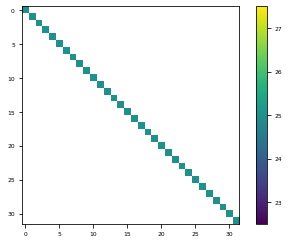

In [27]:
x = cov.as_2d
x[x==0] = np.NaN
c = plt.imshow(x)
plt.colorbar(c)

In [28]:
post_cov = pyemu.Cov.from_ascii(os.path.join(f_d,"freyberg_pp.post.cov"))
post_cov.isdiagonal

False

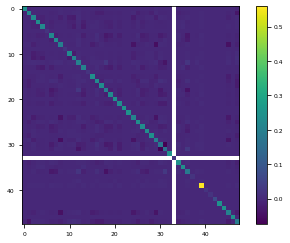

In [29]:
x = post_cov.as_2d
x[x==0] = np.NaN
c = plt.imshow(x)
plt.colorbar(c)

In [30]:
df = post_cov.to_dataframe()
rsum = df.sum(axis=1).sort_values()
rsum

hk05         -0.046626
hk06         -0.018289
hk02         -0.008716
hk23         -0.008532
hk29         -0.002546
hk07          0.000528
hk27          0.002367
hk03          0.011620
hk24          0.012460
rch_0         0.022046
w0_r09_c16    0.022655
w0_r29_c06    0.022655
w0_r26_c10    0.022655
porosity      0.022655
w0_r20_c14    0.022655
w0_r11_c13    0.022655
w0_r34_c12    0.022655
hk28          0.033361
hk20          0.035683
hk19          0.042049
hk30          0.042658
hk04          0.064625
rch_1         0.072789
hk10          0.081994
hk16          0.100528
hk01          0.101147
hk09          0.102103
hk15          0.103153
hk26          0.107662
hk13          0.111858
hk22          0.119536
hk12          0.143370
hk08          0.161408
hk25          0.170947
hk14          0.182088
hk17          0.187980
hk18          0.195345
hk00          0.199939
hk11          0.202428
hk21          0.214905
w1_r29_c06    0.250000
w1_r26_c10    0.250000
w1_r11_c13    0.250000
w1_r20_c14 

### DIY: plot the singular spectrum of the posterior covariance matrix.  Then convert the posterior covariance matrix to correlation matrix, mask the diagonal and plot

In [ ]:
#hint: Cov.to_pearson()

### Residual handling

The `Pst` class tries load a residuals file in the constructor.  If that file is found, you can access some pretty cool stuff (you can pass the name of a residual file to the `Pst` constructor...).  The `res` attribute is stored as a `pd.DataFrame`

In [32]:
pst = pyemu.Pst(os.path.join(f_d,"freyberg_pp.pst"))
pst.phi

412.55703718999166

In [33]:
pst.phi_components

{'calflux': 0.6560999999999854,
 'calhead': 411.9009371899917,
 'flaqx': 0.0,
 'flout': 0.0,
 'flx_constan': 0.0,
 'flx_in-out': 0.0,
 'flx_percent': 0.0,
 'flx_recharg': 0.0,
 'flx_storage': 0.0,
 'flx_stream_': 0.0,
 'flx_total': 0.0,
 'flx_wells': 0.0,
 'forecast': 0.0,
 'pothead': 0.0,
 'vol_constan': 0.0,
 'vol_in-out': 0.0,
 'vol_percent': 0.0,
 'vol_recharg': 0.0,
 'vol_storage': 0.0,
 'vol_stream_': 0.0,
 'vol_total': 0.0,
 'vol_wells': 0.0}

In [34]:
pst.res.head()

,name,group,measured,modelled,residual,weight
name,,,,,,
c001cr03c10_19700102,c001cr03c10_19700102,calhead,26.661526,28.013775,-1.352249,5.0
c001cr03c16_19700102,c001cr03c16_19700102,calhead,23.460564,24.444290,-0.983726,5.0
c001cr04c09_19700102,c001cr04c09_19700102,calhead,28.513522,28.513071,0.000451,5.0
c001cr10c02_19700102,c001cr10c02_19700102,calhead,30.741689,31.881250,-1.139561,5.0
c001cr14c11_19700102,c001cr14c11_19700102,calhead,25.871208,25.444475,0.426733,5.0


### Discrepancy based weight adjustment

In a perfect (model and algorithm) world, we would acheive a final objective function that is equal to the number of (non-zero weighted) observations. But because of model error and simplifying assumptions in the algorithms we use for history matching, this is rarely the case.  More often, the final objective function is much larger than the number of observations.  This implies that we were not able to "fit" as well as we thought we could (were "thought" is incapsulated in the weights in the control file).  This really matters when we do posterior uncertainty analyses following a PEST run - we will see this again in the FOSM and data-worth notebooks. Note: dont make this adjustment until after you are through with history matching!!!

The simpliest way to try to rectify this situation is to adjust the weights in the control file so that the resulting contribution to the objective function from each observation (or optional observation group) is equal 1 (or the number of members of the group).  This is related to Morozov's discrepancy principal (google it!).  `pyEMU` has a built in routine to help with this: `Pst.adjust_weights_discrepancy()` - great name!

original phi: 412.55703718999166


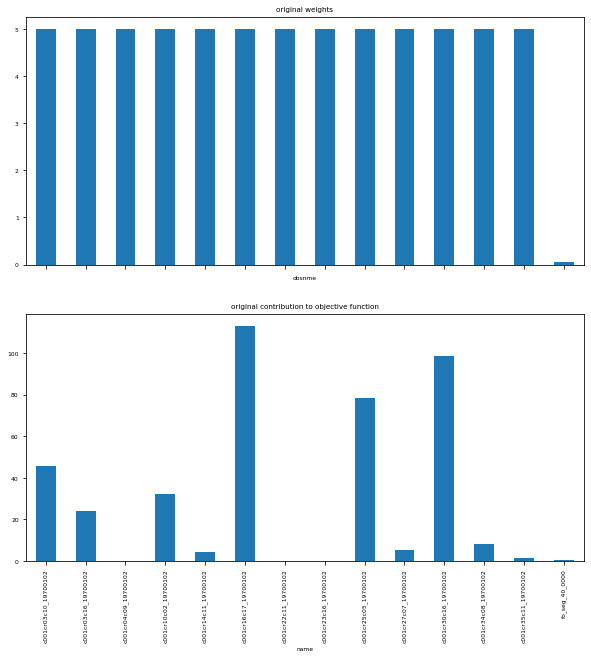

In [35]:
# load a copy of the contol file so we dont goof up later activities with the original
pst2 = pyemu.Pst(os.path.join(f_d,"freyberg_pp.pst"))
obs = pst2.observation_data
fig,axes = plt.subplots(2,1,figsize=(10,10))
pst2.observation_data.loc[pst2.nnz_obs_names,"weight"].plot(kind="bar",ax=axes[0])
pst2.res.loc[pst2.nnz_obs_names,:].apply(lambda x: (x.residual * obs.loc[x.name,"weight"])**2,axis=1).plot(kind="bar",ax=axes[1])
axes[0].set_title("original weights")
axes[1].set_title("original contribution to objective function")
axes[0].set_xticklabels([])
print("original phi:",pst2.phi)

So we see the objective function is much larger than the number of observations and the contribution to phi varies substantially across the observations...

Now for the weight adjustment:

adjusted phi: 10.888659273774653


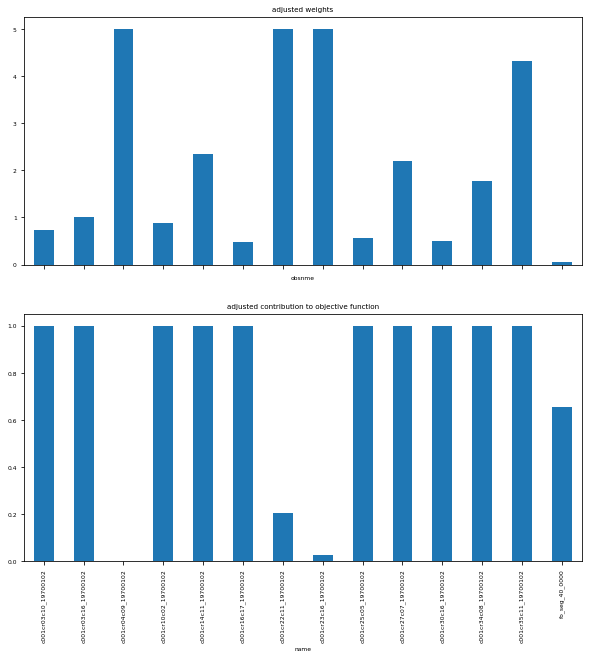

In [36]:
pst2.adjust_weights_discrepancy()
obs = pst2.observation_data
fig,axes = plt.subplots(2,1,figsize=(10,10))
pst2.observation_data.loc[pst2.nnz_obs_names,"weight"].plot(kind="bar",ax=axes[0])
pst2.res.loc[pst2.nnz_obs_names,:].apply(lambda x: (x.residual * obs.loc[x.name,"weight"])**2,axis=1).plot(kind="bar",ax=axes[1])
axes[0].set_title("adjusted weights")
axes[1].set_title("adjusted contribution to objective function")
axes[0].set_xticklabels([])
print("adjusted phi:",pst2.phi)

Now we see the max contribution to phi from any observaton is 1.0.  the reason some of them are less than 1.0 is because we did not want to turn the weights up for the observations that are being matched well (so we keep the weights the same or decrease only, we dont want to increase the weight)

### DIY: plot a bar chart of residuals for non-zero weighted obs

You can use the adjusted weight instance (`pst2`) or the original `pst`

<AxesSubplot:xlabel='name'>

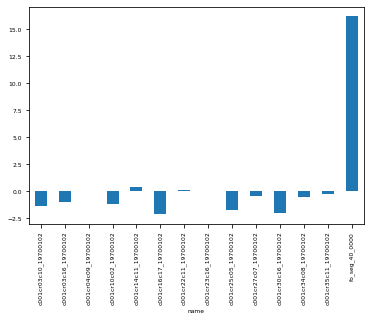

In [40]:
nz_obs_names = pst.nnz_obs_names
nz_obs_names
pst.res.loc[nz_obs_names,"residual"].plot(kind="bar")

### The Jacobian matrix

A dervied pyemu.Matrix type...

In [41]:
jco = pyemu.Jco.from_binary(os.path.join(f_d,"freyberg_pp.jcb"))

In [42]:
df = jco.to_dataframe()
df.head()

,hk00,hk01,hk02,hk03,hk04,hk05,hk06,hk07,hk08,hk09,...,w0_r20_c14,w0_r26_c10,w0_r29_c06,w0_r34_c12,w1_r09_c16,w1_r11_c13,w1_r20_c14,w1_r26_c10,w1_r29_c06,w1_r34_c12
c001cr03c10_19700102,0.047670,0.166151,-1.466431,-1.587458,0.073819,-0.245292,-1.073273,-1.204015,0.009025,-0.548900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c001cr03c16_19700102,0.000694,0.003471,0.008331,0.021984,0.000694,-0.000926,-0.007174,-0.033323,0.000000,-0.005785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c001cr04c09_19700102,0.054844,-0.079373,-1.573573,-1.353273,0.119869,-0.406120,-1.417377,-1.219288,0.011339,-0.668769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c001cr10c02_19700102,-0.292499,-0.813631,-0.924243,-0.749299,-1.115615,-1.743888,-1.162596,-0.765266,-0.549363,-0.664141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c001cr14c11_19700102,-0.021984,-0.089092,-0.356599,-0.520205,0.062711,0.314020,-0.098811,-0.733563,0.087241,-0.066183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### DIY: form the normal matrix (`XtQX`) with non-zero weight obs and plot (`X` is the jacobian is `Q` is the inverse of the observation noise covariance matrix)

In [ ]:
# hint Cov.from_observation_data()


### now invert XtQX:

### Some sweet potting sugar:

10.888659273774653 {'calflux': 0.6560999999999854, 'calhead': 10.232559273774667, 'flaqx': 0.0, 'flout': 0.0, 'flx_constan': 0.0, 'flx_in-out': 0.0, 'flx_percent': 0.0, 'flx_recharg': 0.0, 'flx_storage': 0.0, 'flx_stream_': 0.0, 'flx_total': 0.0, 'flx_wells': 0.0, 'forecast': 0.0, 'pothead': 0.0, 'vol_constan': 0.0, 'vol_in-out': 0.0, 'vol_percent': 0.0, 'vol_recharg': 0.0, 'vol_storage': 0.0, 'vol_stream_': 0.0, 'vol_total': 0.0, 'vol_wells': 0.0} {'calflux': 0.06025535224343027, 'calhead': 0.9397446477565696, 'flaqx': 0.0, 'flout': 0.0, 'flx_constan': 0.0, 'flx_in-out': 0.0, 'flx_percent': 0.0, 'flx_recharg': 0.0, 'flx_storage': 0.0, 'flx_stream_': 0.0, 'flx_total': 0.0, 'flx_wells': 0.0, 'forecast': 0.0, 'pothead': 0.0, 'vol_constan': 0.0, 'vol_in-out': 0.0, 'vol_percent': 0.0, 'vol_recharg': 0.0, 'vol_storage': 0.0, 'vol_stream_': 0.0, 'vol_total': 0.0, 'vol_wells': 0.0}


<AxesSubplot:>

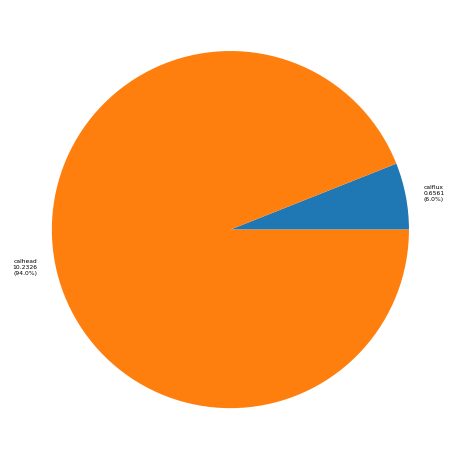

In [43]:
pst2.plot(kind="phi_pie")

[<Figure size 576x756 with 0 Axes>, <Figure size 576x756 with 8 Axes>]

<Figure size 576x756 with 0 Axes>

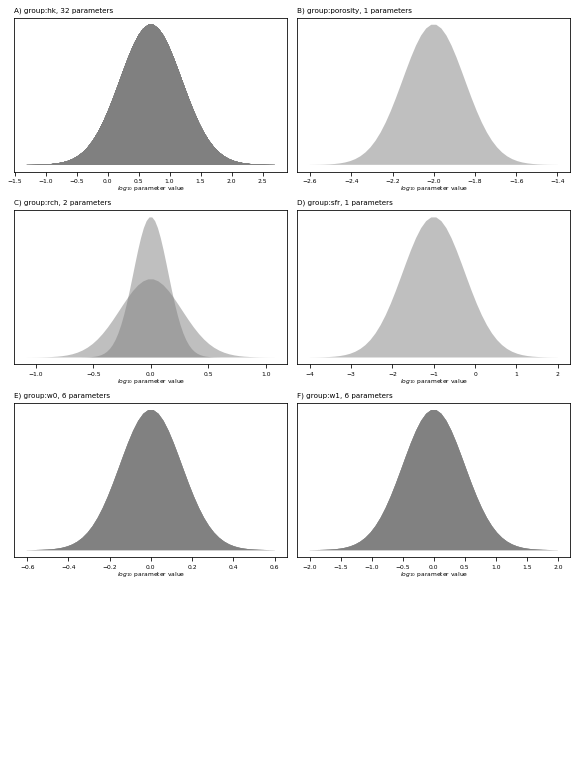

In [44]:
pst.plot(kind='prior')

[<Figure size 576x756 with 0 Axes>, <Figure size 576x756 with 8 Axes>]

<Figure size 576x756 with 0 Axes>

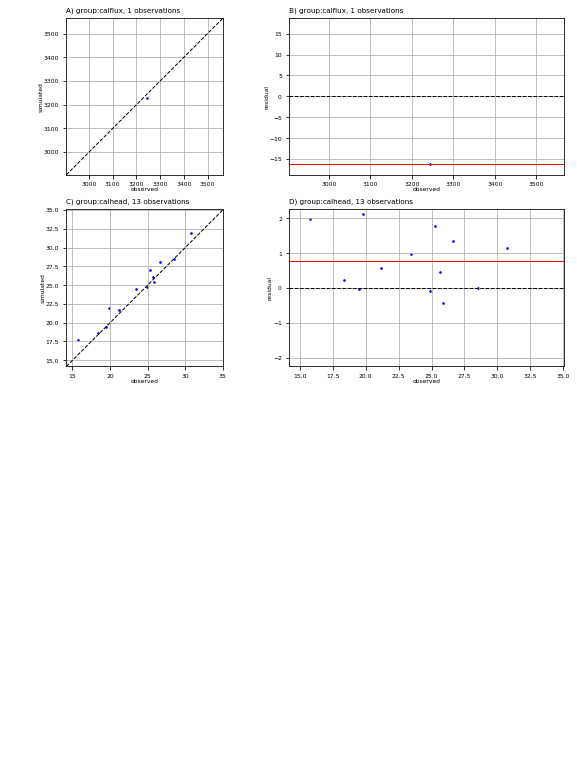

In [45]:
pst.plot(kind="1to1")

In [46]:
pst.write_par_summary_table()

,type,transform,count,initial value,upper bound,lower bound,standard deviation
hk,hk,log,32,0.69897,1.69897,-0.30103,0.5
porosity,porosity,log,1,-2,-1.69897,-2.30103,0.150515
rch,rch,log,2,0,0.30103 to 0.477121,-0.60206 to -0.30103,0.150515 to 0.269795
sfr,sfr,log,1,-1,1,-2,0.75
w0,w0,log,6,0,0.30103,-0.30103,0.150515
w1,w1,log,6,0,1,-1,0.5


### DIY: Adjust the weights so that both non-zero obs groups contribute equally to the objective function (and plot!) - no model runs required...

In [48]:
# hint: pst.adjust_weights
print(pst.nnz_obs_groups)
new_phi = {"calhead":200, "calflux":200}
pst.adjust_weights(obsgrp_dict=new_phi)

['calhead', 'calflux']


In [49]:
pst.phi

399.99999999999994

399.99999999999994 {'calflux': 200.00000000000003, 'calhead': 199.99999999999991, 'flaqx': 0.0, 'flout': 0.0, 'flx_constan': 0.0, 'flx_in-out': 0.0, 'flx_percent': 0.0, 'flx_recharg': 0.0, 'flx_storage': 0.0, 'flx_stream_': 0.0, 'flx_total': 0.0, 'flx_wells': 0.0, 'forecast': 0.0, 'pothead': 0.0, 'vol_constan': 0.0, 'vol_in-out': 0.0, 'vol_percent': 0.0, 'vol_recharg': 0.0, 'vol_storage': 0.0, 'vol_stream_': 0.0, 'vol_total': 0.0, 'vol_wells': 0.0} {'calflux': 0.5000000000000001, 'calhead': 0.49999999999999983, 'flaqx': 0.0, 'flout': 0.0, 'flx_constan': 0.0, 'flx_in-out': 0.0, 'flx_percent': 0.0, 'flx_recharg': 0.0, 'flx_storage': 0.0, 'flx_stream_': 0.0, 'flx_total': 0.0, 'flx_wells': 0.0, 'forecast': 0.0, 'pothead': 0.0, 'vol_constan': 0.0, 'vol_in-out': 0.0, 'vol_percent': 0.0, 'vol_recharg': 0.0, 'vol_storage': 0.0, 'vol_stream_': 0.0, 'vol_total': 0.0, 'vol_wells': 0.0}


<AxesSubplot:>

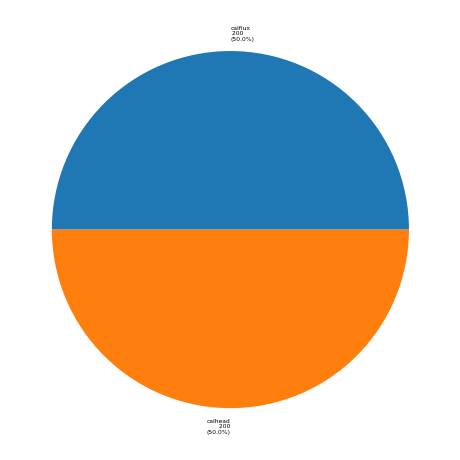

In [50]:
pst.plot(kind="phi_pie")

### Geostats in pyemu

These are pure python so they arent super fast...

<AxesSubplot:xlabel='distance', ylabel='$\\gamma$'>

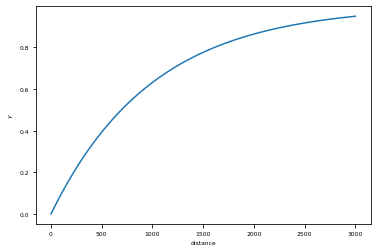

In [51]:
v_contribution = 1.0 # variance
v_range = 1000
exp_vario = pyemu.geostats.ExpVario(v_contribution,v_range)
exp_vario.plot()

now lets build a covariance matrix from x-y points.  We can generate these randomly or just use the pilot points template file:

In [52]:
df = pyemu.pp_utils.pp_tpl_to_dataframe(os.path.join(f_d,"hkpp.dat.tpl"))
df.head()

,name,x,y,zone,parnme
0,pp_0000,625.0,9375.0,1,hk00
1,pp_0001,1625.0,9375.0,1,hk01
2,pp_0002,2625.0,9375.0,1,hk02
3,pp_0003,3625.0,9375.0,1,hk03
4,pp_0004,625.0,8375.0,1,hk04


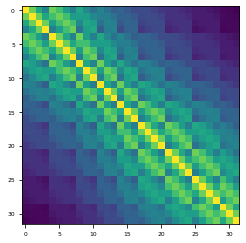

In [53]:
plt.imshow(pyemu.geostats.ExpVario(0.1,5000).covariance_matrix(df.x,df.y,df.name).x)

Here we will just use a 1-D sequence to get a cov matrix (think "time series")

In [54]:
times = np.arange(0,365,1)
y = np.ones_like(times)
names = ["t_"+str(t) for t in times]

<AxesSubplot:xlabel='distance', ylabel='$\\gamma$'>

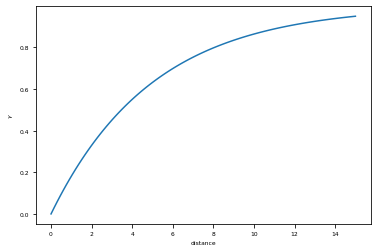

In [55]:
v_contribution = 1.0 # variance
v_range = 5 # days
exp_vario = pyemu.geostats.ExpVario(v_contribution,v_range)
exp_vario.plot()

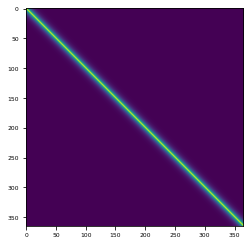

In [56]:
cov = exp_vario.covariance_matrix(times,y,names)
plt.imshow(cov.x)

### Ensembles

The pyemu ensemble class inherit from pandas DataFrame so all that nice stuff is included for free

In [58]:
pe = pyemu.ParameterEnsemble.from_gaussian_draw(pst=pst,cov=pyemu.Cov.from_parameter_data(pst),num_reals=1000)
pe.head()
pe.enforce()

Check your understanding: where did the first (mean vector) and second (covariance matrix) moments come from in that ensemble generation?  

<AxesSubplot:>

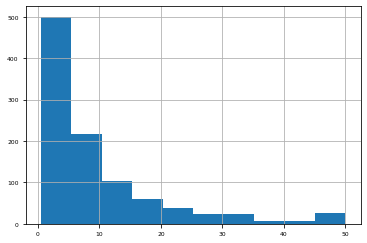

In [59]:
pe.iloc[:,0].hist()

<AxesSubplot:>

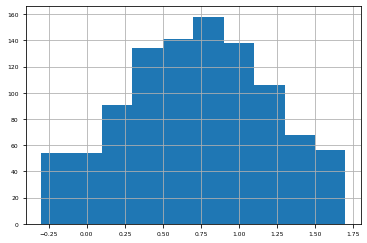

In [60]:
pe.iloc[:,0].apply(np.log10).hist()

So that was really easy...but what if we want to express spatial/temporal correlation in the prior?  that means we need to form mixed block-diagonal/diagonal cov matrix and then draw from it. In this case, we have spatially correlated pilot point parameters:

In [61]:
df = pyemu.pp_utils.pp_tpl_to_dataframe(os.path.join(f_d,"hkpp.dat.tpl"))
df.head()

,name,x,y,zone,parnme
0,pp_0000,625.0,9375.0,1,hk00
1,pp_0001,1625.0,9375.0,1,hk01
2,pp_0002,2625.0,9375.0,1,hk02
3,pp_0003,3625.0,9375.0,1,hk03
4,pp_0004,625.0,8375.0,1,hk04


Let's build a combined, block diagonal matrix:

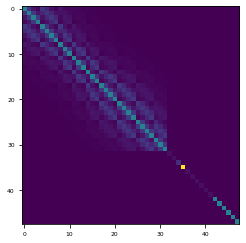

In [63]:
ev = pyemu.geostats.ExpVario(1.0,1000)
gs = pyemu.geostats.GeoStruct(variograms=ev)
cov = pyemu.helpers.geostatistical_prior_builder(pst=pst,struct_dict={gs:df})
x = cov.x.copy()
x[x<0.0] = np.NaN
plt.imshow(x)

This is exactly the same line as above except here the `cov` includes some off-diagonals for the pilot points

In [64]:
pe = pyemu.ParameterEnsemble.from_gaussian_draw(pst=pst,cov=cov,num_reals=10000)
pe.head()

drawing from group hk
drawing from group porosity
drawing from group rch
drawing from group sfr
drawing from group w0
drawing from group w1


,hk00,hk01,hk02,hk03,hk04,hk05,hk06,hk07,hk08,hk09,...,w0_r20_c14,w0_r26_c10,w0_r29_c06,w0_r34_c12,w1_r09_c16,w1_r11_c13,w1_r20_c14,w1_r26_c10,w1_r29_c06,w1_r34_c12
0,2.410834,1.606041,3.804726,0.579556,3.012169,2.450562,1.236222,2.252614,26.397557,5.823253,...,1.500203,1.225264,1.313278,0.585895,1.695033,0.935806,0.783769,7.310287,2.325792,0.349453
1,10.581820,3.396911,9.415640,2.406684,0.583915,3.204234,3.900425,6.089089,9.941406,9.633828,...,1.284816,2.337254,0.978855,1.551234,0.245953,0.632539,1.391843,3.882963,0.476788,0.266946
2,1.451769,6.763432,2.170873,10.400568,5.952819,1.726097,6.644414,25.499866,3.063735,4.625351,...,0.822377,1.085964,0.604545,0.989763,0.195231,1.428850,0.780260,0.202717,16.748857,0.171889
3,7.013140,4.537041,2.513742,3.072588,7.744998,9.711806,7.931231,16.579946,5.922426,6.514112,...,0.888042,1.369762,1.134346,1.027038,0.400020,0.729388,7.263577,0.989202,0.784673,5.427262
4,4.184592,10.600548,9.846218,17.800418,16.257889,13.867683,3.097290,9.591615,35.953736,4.106522,...,0.653442,0.736079,1.817342,1.123941,1.751388,1.864319,4.886276,1.029271,0.835015,5.179423


Lets plot the values of the pilot points in space to see their correlation (or lack thereof)

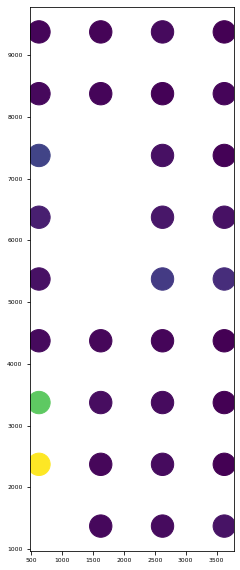

In [65]:
df.index = df.parnme
df.loc[:,"parval1"] = pe.loc[0,df.parnme].values
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111,aspect="equal")
plt.scatter(df.x,df.y,c=df.parval1,s=500)

You can "kind of" see that correlation, but if we krige these values to the model grid, we can really see it...

In [66]:
df.loc[:,"parval1"] = pe.loc[0,df.parnme]
df.index = np.arange(df.shape[0])
arr = pyemu.geostats.fac2real(df,factors_file=os.path.join(f_d,"hkpp.dat.fac"),out_file=None)

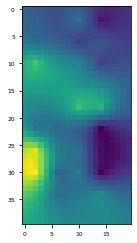

In [67]:
plt.imshow(np.log10(arr))

### DIY: experiment with changing the variogram range and seeing how it changes the resulting parameter fields

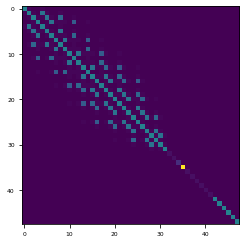

In [73]:
ev = pyemu.geostats.ExpVario(1.0,10000,anisotropy=50,bearing=45)
gs = pyemu.geostats.GeoStruct(variograms=ev)
cov = pyemu.helpers.geostatistical_prior_builder(pst=pst,struct_dict={gs:df})
x = cov.x.copy()
x[x<0.0] = np.NaN
plt.imshow(x)


drawing from group hk
drawing from group porosity
drawing from group rch
drawing from group sfr
drawing from group w0
drawing from group w1


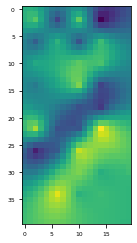

In [74]:
pe = pyemu.ParameterEnsemble.from_gaussian_draw(pst=pst,cov=cov,num_reals=100)
df.index = df.parnme
df.loc[:,"parval1"] = pe.loc[0,df.parnme].values
df.loc[:,"parval1"] = pe.loc[0,df.parnme]
df.index = np.arange(df.shape[0])
arr = pyemu.geostats.fac2real(df,factors_file=os.path.join(f_d,"hkpp.dat.fac"),out_file=None)
plt.imshow(np.log10(arr))

FORESHADOWING: we can also form an empirical covariance matrix from this par ensemble!

In [ ]:
emp_cov = pe.covariance_matrix()
x = emp_cov.x.copy()
x[x<1.0e-3] = np.NaN
plt.imshow(x)

### Spectral simulation

Because pyemu is pure python (and because the developers are lazy), it only implments spectral simulation for grid-scale field generation.  For regular grids without anisotropy and without conditioning data ("known" property values), it is identical to sequential gaussian sim

SpecSim.initialize() summary: full_delx X full_dely: 116 X 116


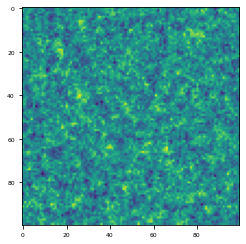

In [75]:
ev = pyemu.geostats.ExpVario(1.0,1)
gs = pyemu.geostats.GeoStruct(variograms=ev)
ss = pyemu.geostats.SpecSim2d(np.ones(100),np.ones(100),gs)
plt.imshow(ss.draw_arrays()[0])

SpecSim.initialize() summary: full_delx X full_dely: 132 X 132


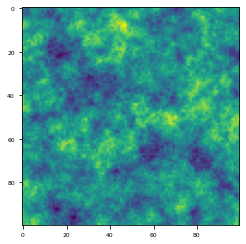

In [76]:
ev = pyemu.geostats.ExpVario(1.0,5)
gs = pyemu.geostats.GeoStruct(variograms=ev)
ss = pyemu.geostats.SpecSim2d(np.ones(100),np.ones(100),gs)
plt.imshow(ss.draw_arrays()[0])

SpecSim.initialize() summary: full_delx X full_dely: 3108 X 3108


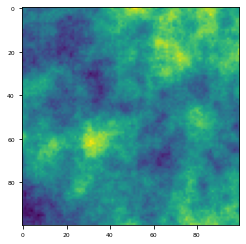

In [77]:
ev = pyemu.geostats.ExpVario(1.0,500)
gs = pyemu.geostats.GeoStruct(variograms=ev)
ss = pyemu.geostats.SpecSim2d(np.ones(100),np.ones(100),gs)
plt.imshow(ss.draw_arrays()[0])